# Tache 1.2

## Modèles de Embeddings

- L'idée est de chercher les mots proches sémantiquement des termes primaires ou secondaires que nous avons déjà en utilisant les embeddings de ces termes.  
- On peut faire cela avec plusieurs embedders, qui ont également utile pour une extension sémantique par exemple :  Word2Vec, BERT, Glove...

### fasttext

pip install fasttext==0.9.3

wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fr.300.bin.gz

gunzip cc.fr.300.bin.gz

In [ ]:
import fasttext

modelFastext = fasttext.load_model("/teamspace/studios/this_studio/cc.fr.300.bin") 

keywords = ["Vie en autarcie", "Autosuffisance", "Fermentation","Poêle de masse"]

for keyword in keywords:
    similar_words = modelFastext.get_nearest_neighbors(keyword, k=3)
    print(f"Expansions pour '{keyword}': {similar_words} \n")

Expansions pour 'Vie en autarcie': [(0.6295375227928162, 'quasi-autarcie'), (0.5857999920845032, 'Autarcie'), (0.5106639266014099, 'aiutarci')] 

Expansions pour 'Autosuffisance': [(0.6425352096557617, 'autosuffisance'), (0.6188276410102844, 'Auto-suffisance'), (0.5622236728668213, 'auto-suffisance')] 

Expansions pour 'Fermentation': [(0.6766241788864136, 'fermentation'), (0.6169770956039429, 'Fermentations'), (0.5800446271896362, 'fermentations')] 

Expansions pour 'Poêle de masse': [(0.5726413130760193, 'Poêlerie'), (0.5305557250976562, 'Plebs.3x08.FR.FBK.zipRelease'), (0.5272475481033325, 'policeAlcalaAmiralBerettaBlooCaporalColonelLeBeauneLeChaufferieLeFrançoisMaaxMaaxMonoMaaxRoundedNorrPlaakRobinAlcala')] 



### Word2Vec

pip install gensim==4.3.3

#### Google News model

In [ ]:
import gensim.downloader as api

modelGoogleNews = api.load("word2vec-google-news-300") 
similar_words = modelGoogleNews.most_similar("fermentation", topn=3)
print(f"Similar words to 'fermentation': {similar_words}")

Similar words to 'fermentation': [('secondary_fermentation', 0.7000930905342102), ('yeast', 0.6928147077560425), ('malolactic_fermentation', 0.6912585496902466)]


#### French Model

In [ ]:
from gensim.models import KeyedVectors

model_path = '/teamspace/studios/this_studio/frWac.bin'
modelFrench = KeyedVectors.load_word2vec_format(model_path, binary=True, unicode_errors="ignore")

mots = [
    "potager", "filtre berkey", "permaculture", "filtre doulton", "poêle à bois bouilleur", 
    "poêle de masse", "cuve eau pluie", "maison terre-paille", "maison torchis", "ferme en pierre",
    "maraîchage", "culture lasagnes", "aquaponie", "agroforesterie", "forage manuel", 
    "puits artésien", "filtration naturelle", "biogaz maison", "kerterre", "fermentation", "fumage",
    "autosuffisance", "autonomie alimentaire", "autonomie énergétique", "autonomie en eau", 
    "vie en autarcie", "habitats autonomes"
]


mots_present = 0
mots_absent = 0
mots_similaires = []

for mot in mots:
    if mot in modelFrench:
        mots_present += 1
        similar_words = modelFrench.most_similar(mot, topn=3)
        mots_similaires.append((mot, similar_words))
    else:
        mots_absent += 1

pourcentage_absents = (mots_absent / len(mots)) * 100

for mot, similar_words in mots_similaires:
    print(f"\nMots similaires à '{mot}':")
    for word, similarity in similar_words:
        print(f"  {word}: {similarity}")


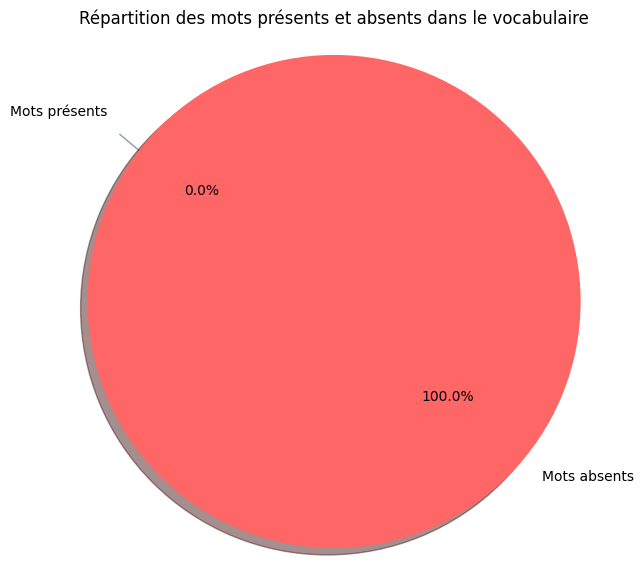

In [ ]:
import matplotlib.pyplot as plt

labels = ['Mots présents', 'Mots absents']
sizes = [mots_present, mots_absent]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Répartition des mots présents et absents dans le vocabulaire')
plt.show()

# Tache 1.4

In [2]:
import json 

with open("../jsons/videos.json", "r", encoding="utf-8") as file:
    videos = json.load(file)
    print(len(videos))

6866


In [3]:
import random

echantillon = random.sample(videos, min(1000, len(videos)))
with open("../jsons/echantillon.json", "w", encoding="utf-8") as f:
    json.dump(echantillon, f, ensure_ascii=False, indent=2)

## Plots 

In [20]:
import json
with open("../jsons/echantillon.json", "r", encoding="utf-8") as f:
    echantillon = json.load(f)

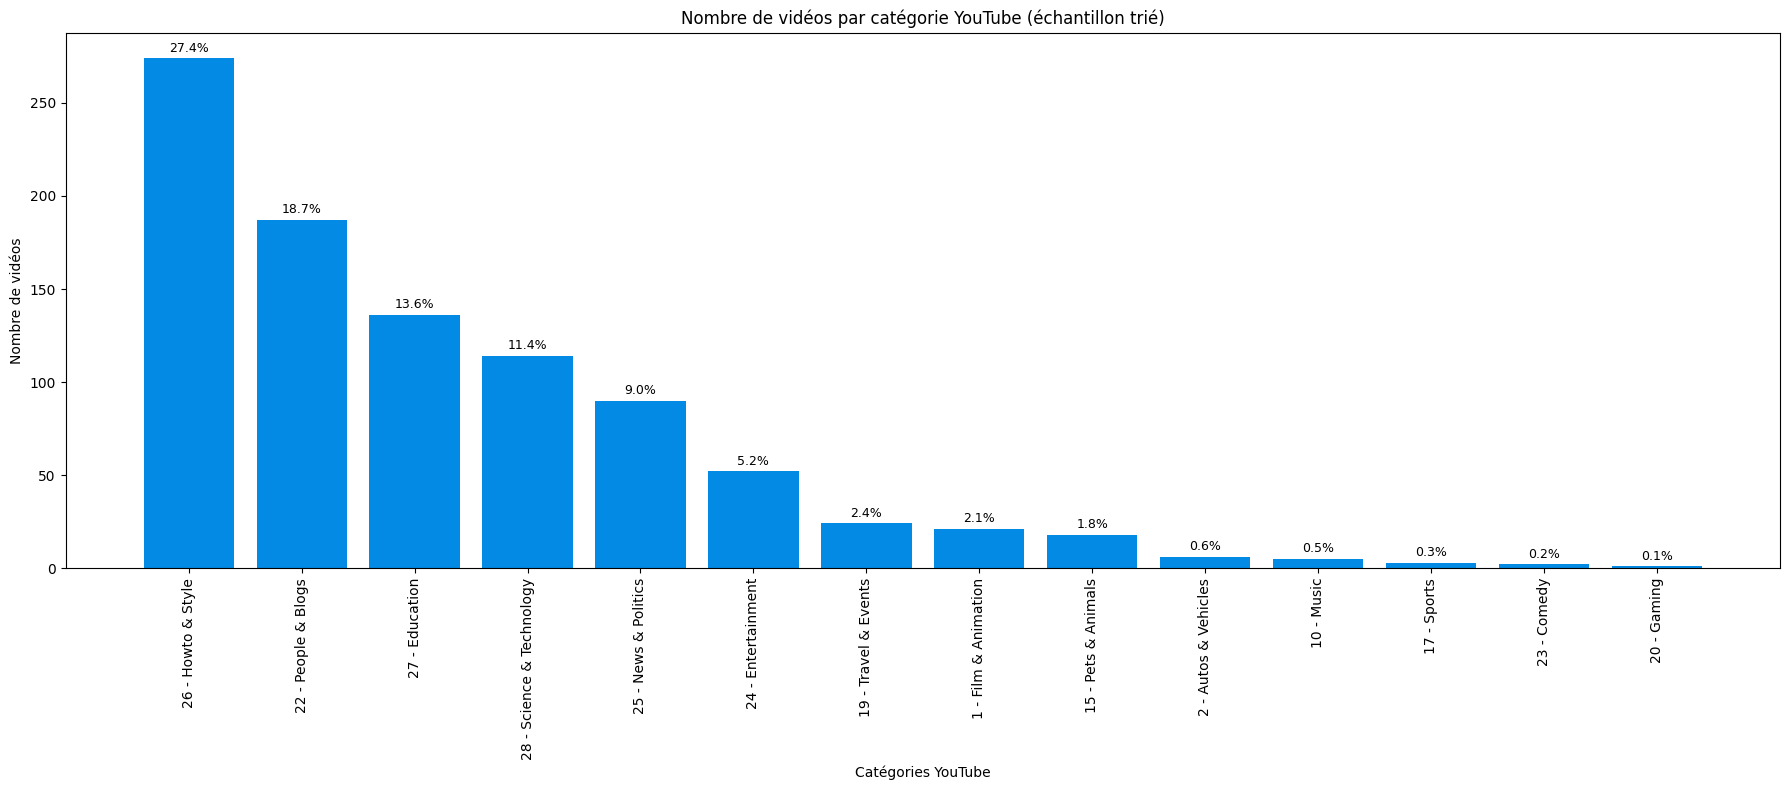

In [19]:
import matplotlib.pyplot as plt
from collections import Counter

categorie_labels = {
    1: "Film & Animation", 2: "Autos & Vehicles", 10: "Music", 15: "Pets & Animals", 17: "Sports",
    18: "Short Movies", 19: "Travel & Events", 20: "Gaming", 21: "Videoblogging", 22: "People & Blogs",
    23: "Comedy", 24: "Entertainment", 25: "News & Politics", 26: "Howto & Style", 27: "Education",
    28: "Science & Technology", 30: "Movies", 31: "Anime/Animation", 32: "Action/Adventure", 33: "Classics",
    34: "Comedy", 35: "Documentary", 36: "Drama", 37: "Family", 38: "Foreign", 39: "Horror",
    40: "Sci-Fi/Fantasy", 41: "Thriller", 42: "Shorts", 43: "Shows", 44: "Trailers"
}

compteur_categories = {i: 0 for i in categorie_labels.keys()}

for video in echantillon:
    cat = video.get("youtubeCategorie")
    if cat and cat.isdigit():
        cat_id = int(cat)
        if cat_id in compteur_categories:
            compteur_categories[cat_id] += 1

# Filtrage des catégories avec au moins 1 vidéo
filtre = [(i, compteur_categories[i]) for i in compteur_categories if compteur_categories[i] > 0]

# Calcul des pourcentages et tri décroissant
total = sum(freq for _, freq in filtre)
trié = sorted(filtre, key=lambda x: x[1], reverse=True)
labels = [f"{i} - {categorie_labels[i]}" for i, _ in trié]
frequences = [freq for _, freq in trié]

plt.figure(figsize=(18, 8))
bars = plt.bar(labels, frequences, color="#028ae4")
plt.xlabel("Catégories YouTube")
plt.ylabel("Nombre de vidéos")
plt.title("Nombre de vidéos par catégorie YouTube (échantillon trié)")
plt.xticks(rotation=90)

for bar, freq in zip(bars, frequences):
    pourcentage = (freq/1000)*100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f"{pourcentage:.1f}%", 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


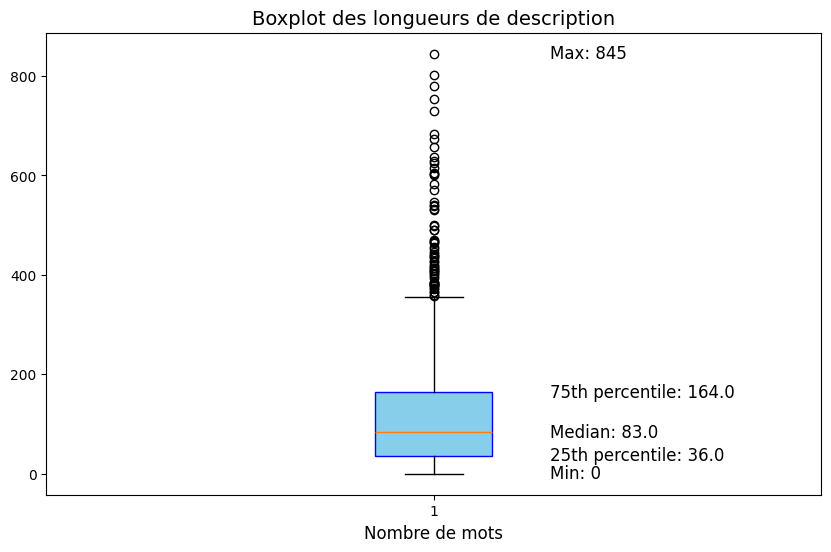

In [34]:
import matplotlib.pyplot as plt
import numpy as np


def word_count(description):
    return len(description.split())

word_counts = [word_count(video['description']) for video in echantillon]

quartiles = np.percentile(word_counts, [25, 50, 75])
min_value = np.min(word_counts)
max_value = np.max(word_counts)

plt.figure(figsize=(10, 6))
plt.boxplot(word_counts, vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue", color="blue"))

plt.xlabel('Nombre de mots', fontsize=12)
plt.title('Boxplot des longueurs de description', fontsize=14)

plt.text(1.15, min_value, f"Min: {min_value}", fontsize=12, verticalalignment='center')
plt.text(1.15, quartiles[0], f"25th percentile: {quartiles[0]}", fontsize=12, verticalalignment='center')
plt.text(1.15, quartiles[1], f"Median: {quartiles[1]}", fontsize=12, verticalalignment='center')
plt.text(1.15, quartiles[2], f"75th percentile: {quartiles[2]}", fontsize=12, verticalalignment='center')
plt.text(1.15, max_value, f"Max: {max_value}", fontsize=12, verticalalignment='center')

plt.show()


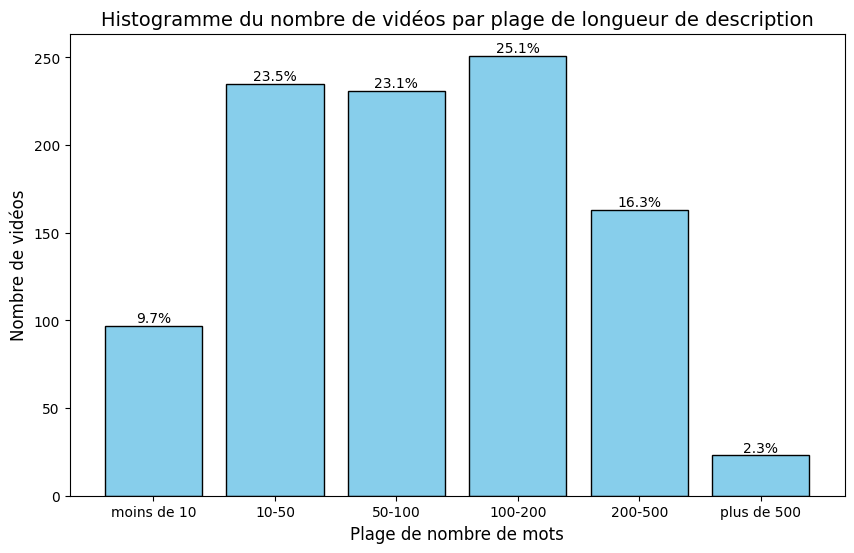

In [32]:
import json
import matplotlib.pyplot as plt

# Charger les données JSON depuis le fichier
with open("../jsons/echantillon.json", "r", encoding="utf-8") as f:
    echantillon = json.load(f)

# Fonction pour calculer le nombre de mots dans la description
def word_count(description):
    return len(description.split())

# Obtenir le nombre de mots pour chaque description
word_counts = [word_count(video['description']) for video in echantillon]

# Définir les intervalles et initialiser un dictionnaire pour compter les vidéos dans chaque intervalle
intervals = {
    'moins de 10': 0,
    '10-50': 0,
    '50-100': 0,
    '100-200': 0,
    '200-500': 0,
    'plus de 500': 0
}

# Remplir le dictionnaire avec les comptages pour chaque intervalle
for word_count_value in word_counts:
    if word_count_value < 10:
        intervals['moins de 10'] += 1
    elif 10 <= word_count_value < 50:
        intervals['10-50'] += 1
    elif 50 <= word_count_value < 100:
        intervals['50-100'] += 1
    elif 100 <= word_count_value < 200:
        intervals['100-200'] += 1
    elif 200 <= word_count_value < 500:
        intervals['200-500'] += 1
    else:
        intervals['plus de 500'] += 1

# Calculer le nombre total de vidéos
total_videos = sum(intervals.values())

# Créer l'histogramme à partir du dictionnaire
plt.figure(figsize=(10, 6))
bars = plt.bar(intervals.keys(), intervals.values(), color='skyblue', edgecolor='black')

# Ajouter les labels et le titre
plt.xlabel('Plage de nombre de mots', fontsize=12)
plt.ylabel('Nombre de vidéos', fontsize=12)
plt.title('Histogramme du nombre de vidéos par plage de longueur de description', fontsize=14)

# Ajouter les pourcentages au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_videos) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10)

# Afficher l'histogramme
plt.show()
